2024-10-18 03:42:16.493959: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-18 03:42:16.804636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 03:42:17.591671: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


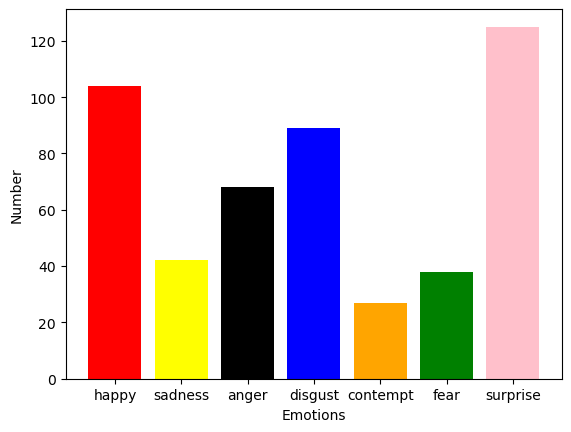

Found 493 images belonging to 7 classes.
Found 488 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.


2024-10-18 03:42:19.326758: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 03:42:19.504274: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 03:42:19.504421: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [1]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

#model.summary()






# Visualize the model.
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')


In [2]:


epochs = 500

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     
    
    
    

Epoch 1/500


/tmp/ipykernel_3674/1862251306.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,
2024-10-18 03:42:22.832098: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-10-18 03:42:23.364298: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-18 03:42:23.379661: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x723c0389c3e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-18 03:42:23.379677: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-10-18 03:42:23.394791: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR 

7/7 [==============================] - 4s 115ms/step - loss: 2.0274 - accuracy: 0.3403 - val_loss: 2.3894 - val_accuracy: 0.5201
Epoch 2/500
7/7 [==============================] - 0s 43ms/step - loss: 1.1246 - accuracy: 0.5874 - val_loss: 1.9013 - val_accuracy: 0.5580
Epoch 3/500
7/7 [==============================] - 0s 39ms/step - loss: 0.8584 - accuracy: 0.7098 - val_loss: 1.3940 - val_accuracy: 0.6272
Epoch 4/500
7/7 [==============================] - 0s 43ms/step - loss: 0.7122 - accuracy: 0.7343 - val_loss: 1.0612 - val_accuracy: 0.7054
Epoch 5/500
7/7 [==============================] - 0s 40ms/step - loss: 0.5292 - accuracy: 0.8275 - val_loss: 0.8717 - val_accuracy: 0.7321
Epoch 6/500
7/7 [==============================] - 0s 42ms/step - loss: 0.4232 - accuracy: 0.8485 - val_loss: 0.8365 - val_accuracy: 0.7366
Epoch 7/500
7/7 [==============================] - 0s 46ms/step - loss: 0.3896 - accuracy: 0.8741 - val_loss: 0.7748 - val_accuracy: 0.7589
Epoch 8/500
7/7 [==============

7/7 [==============================] - 0s 41ms/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.3184 - val_accuracy: 0.9085
Epoch 60/500
7/7 [==============================] - 0s 46ms/step - loss: 0.0161 - accuracy: 0.9977 - val_loss: 0.3055 - val_accuracy: 0.9040
Epoch 61/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0199 - accuracy: 0.9953 - val_loss: 0.3057 - val_accuracy: 0.9062
Epoch 62/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0189 - accuracy: 0.9977 - val_loss: 0.3161 - val_accuracy: 0.9174
Epoch 63/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0248 - accuracy: 0.9883 - val_loss: 0.3459 - val_accuracy: 0.9129
Epoch 64/500
7/7 [==============================] - 0s 43ms/step - loss: 0.0165 - accuracy: 0.9977 - val_loss: 0.3499 - val_accuracy: 0.9129
Epoch 65/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0243 - accuracy: 0.9911 - val_loss: 0.3562 - val_accuracy: 0.9129
Epoch 66/500
7/7 [========

7/7 [==============================] - 0s 39ms/step - loss: 0.0350 - accuracy: 0.9844 - val_loss: 0.7051 - val_accuracy: 0.8951
Epoch 118/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0206 - accuracy: 0.9953 - val_loss: 0.7913 - val_accuracy: 0.8795
Epoch 119/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0304 - accuracy: 0.9860 - val_loss: 0.7723 - val_accuracy: 0.8750
Epoch 120/500
7/7 [==============================] - 0s 40ms/step - loss: 0.0127 - accuracy: 0.9977 - val_loss: 0.6977 - val_accuracy: 0.8951
Epoch 121/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0204 - accuracy: 0.9907 - val_loss: 0.6736 - val_accuracy: 0.8839
Epoch 122/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0180 - accuracy: 0.9977 - val_loss: 0.6426 - val_accuracy: 0.8884
Epoch 123/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.5579 - val_accuracy: 0.9107
Epoch 124/500
7/7 [=

Epoch 175/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4716 - val_accuracy: 0.9040
Epoch 176/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.5912 - val_accuracy: 0.8996
Epoch 177/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0120 - accuracy: 0.9953 - val_loss: 0.5749 - val_accuracy: 0.9085
Epoch 178/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0062 - accuracy: 0.9977 - val_loss: 0.5403 - val_accuracy: 0.8996
Epoch 179/500
7/7 [==============================] - 0s 40ms/step - loss: 0.0259 - accuracy: 0.9930 - val_loss: 0.5108 - val_accuracy: 0.9062
Epoch 180/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.4938 - val_accuracy: 0.9129
Epoch 181/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0152 - accuracy: 0.9978 - val_loss: 0.4978 - val_accuracy: 0.9040
Epoch 

Epoch 233/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0254 - accuracy: 0.9907 - val_loss: 0.6384 - val_accuracy: 0.8973
Epoch 234/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0236 - accuracy: 0.9907 - val_loss: 0.7592 - val_accuracy: 0.8817
Epoch 235/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0714 - accuracy: 0.9930 - val_loss: 0.7951 - val_accuracy: 0.8750
Epoch 236/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0349 - accuracy: 0.9844 - val_loss: 0.8436 - val_accuracy: 0.8817
Epoch 237/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0573 - accuracy: 0.9814 - val_loss: 0.7869 - val_accuracy: 0.8929
Epoch 238/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.6466 - val_accuracy: 0.8973
Epoch 239/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0266 - accuracy: 0.9907 - val_loss: 0.6244 - val_accuracy: 0.8973
Epoch 

Epoch 291/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0056 - accuracy: 0.9977 - val_loss: 0.6702 - val_accuracy: 0.9085
Epoch 292/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0084 - accuracy: 0.9953 - val_loss: 0.6348 - val_accuracy: 0.9107
Epoch 293/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.5897 - val_accuracy: 0.9062
Epoch 294/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.5448 - val_accuracy: 0.9129
Epoch 295/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.5750 - val_accuracy: 0.9107
Epoch 296/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0074 - accuracy: 0.9953 - val_loss: 0.5937 - val_accuracy: 0.9107
Epoch 297/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0293 - accuracy: 0.9930 - val_loss: 0.6211 - val_accuracy: 0.9062
Epoch 

Epoch 349/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.6170 - val_accuracy: 0.9129
Epoch 350/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.6041 - val_accuracy: 0.9107
Epoch 351/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.5869 - val_accuracy: 0.9129
Epoch 352/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5686 - val_accuracy: 0.9152
Epoch 353/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.5588 - val_accuracy: 0.9174
Epoch 354/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0055 - accuracy: 0.9977 - val_loss: 0.5591 - val_accuracy: 0.9085
Epoch 355/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0123 - accuracy: 0.9955 - val_loss: 0.5529 - val_accuracy: 0.9107
Epoch 

Epoch 407/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0059 - accuracy: 0.9978 - val_loss: 0.7549 - val_accuracy: 0.9174
Epoch 408/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7657 - val_accuracy: 0.9085
Epoch 409/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0049 - accuracy: 0.9977 - val_loss: 0.7606 - val_accuracy: 0.9107
Epoch 410/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0072 - accuracy: 0.9953 - val_loss: 0.7641 - val_accuracy: 0.9107
Epoch 411/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.7437 - val_accuracy: 0.9085
Epoch 412/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0114 - accuracy: 0.9953 - val_loss: 0.7172 - val_accuracy: 0.9107
Epoch 413/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0046 - accuracy: 0.9977 - val_loss: 0.7274 - val_accuracy: 0.9040
Epoch 

Epoch 465/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0050 - accuracy: 0.9977 - val_loss: 0.7050 - val_accuracy: 0.9040
Epoch 466/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.6950 - val_accuracy: 0.9040
Epoch 467/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.6974 - val_accuracy: 0.8996
Epoch 468/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0041 - accuracy: 0.9977 - val_loss: 0.6848 - val_accuracy: 0.9062
Epoch 469/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0035 - accuracy: 0.9977 - val_loss: 0.6727 - val_accuracy: 0.9107
Epoch 470/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6596 - val_accuracy: 0.9107
Epoch 471/500
7/7 [==============================] - 0s 38ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6508 - val_accuracy: 0.9196
Epoch 

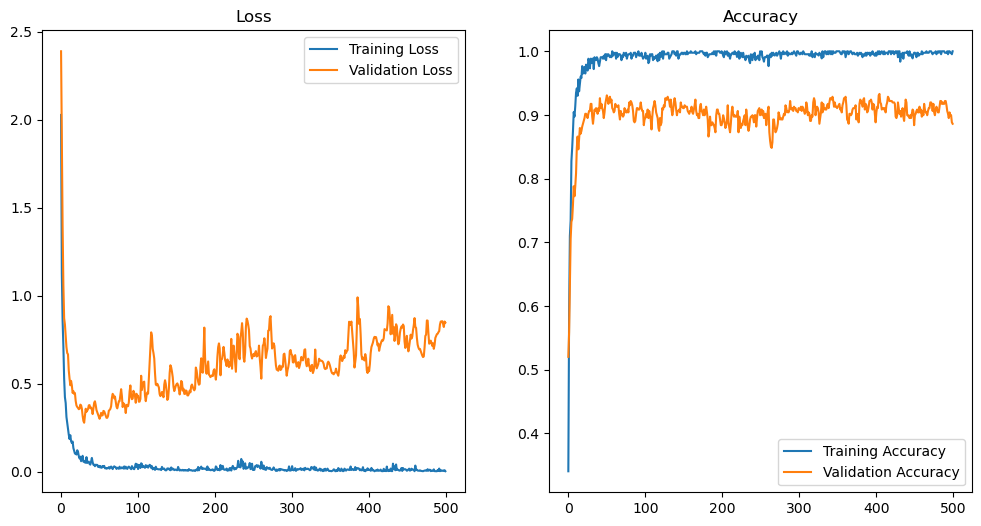

In [3]:

    
    
    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [4]:
#CKRESNET

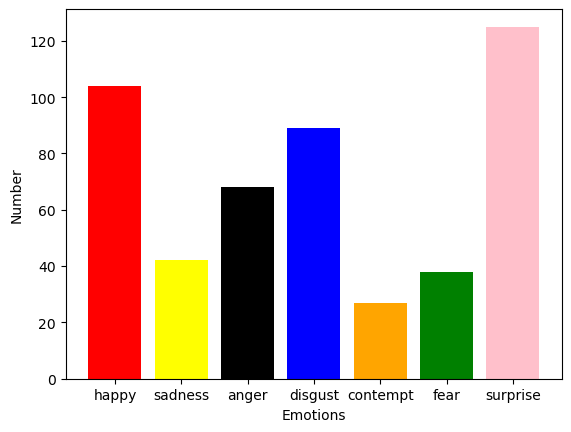

Found 493 images belonging to 7 classes.
Found 488 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.
Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                             

 conv2_block2_out (Activati  (None, 12, 12, 256)          0         ['conv2_block2_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 12, 12, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)   

                                                                                                  
 conv3_block2_2_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 6, 6, 512)            66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 6, 6, 512)            2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_blo

 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 6, 6, 128)            147584    ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_2_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block5_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_2_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block5_2_bn[0][0]']   
 ation)                                                                                           
          

 conv3_block8_1_conv (Conv2  (None, 6, 6, 128)            65664     ['conv3_block7_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv3_block8_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block8_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block8_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block8_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block8_2_conv (Conv2  (None, 6, 6, 128)            147584    ['conv3_block8_1_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block2_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block2_3_bn (BatchNo  (None, 3, 3, 1024)           4096      ['conv4_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block2_add (Add)      (None, 3, 3, 1024)           0         ['conv4_block1_out[0][0]',    
                                                                     'conv4_block2_3_bn[0][0]']   
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block5_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block5_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block5_2_relu[0][0]'] 
 D)                                                                                               
          

 conv4_block8_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block8_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block8_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block8_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block8_2_conv (Conv2  (None, 3, 3, 256)            590080    ['conv4_block8_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block8_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block8_2_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv4_block10_out (Activat  (None, 3, 3, 1024)           0         ['conv4_block10_add[0][0]']   
 ion)                                                                                             
                                                                                                  
 conv4_block11_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block10_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_block11_1_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block11_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block13_3_bn (BatchN  (None, 3, 3, 1024)           4096      ['conv4_block13_3_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_add (Add)     (None, 3, 3, 1024)           0         ['conv4_block12_out[0][0]',   
                                                                     'conv4_block13_3_bn[0][0]']  
                                                                                                  
 conv4_block13_out (Activat  (None, 3, 3, 1024)           0         ['conv4_block13_add[0][0]']   
 ion)                                                                                             
          

 conv4_block16_2_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block16_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block16_2_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block16_2_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block16_3_conv (Conv  (None, 3, 3, 1024)           263168    ['conv4_block16_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_3_bn (BatchN  (None, 3, 3, 1024)           4096      ['conv4_block16_3_conv[0][0]']
 ormalizat

                                                                                                  
 conv4_block19_1_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block19_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block19_2_conv (Conv  (None, 3, 3, 256)            590080    ['conv4_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block19_2_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block19_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 ion)                                                                                             
                                                                                                  
 conv4_block22_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block21_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_block22_1_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block22_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block22_1_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block22_1_bn[0][0]']  
 vation)                                                                                          
          

 conv4_block24_3_bn (BatchN  (None, 3, 3, 1024)           4096      ['conv4_block24_3_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block24_add (Add)     (None, 3, 3, 1024)           0         ['conv4_block23_out[0][0]',   
                                                                     'conv4_block24_3_bn[0][0]']  
                                                                                                  
 conv4_block24_out (Activat  (None, 3, 3, 1024)           0         ['conv4_block24_add[0][0]']   
 ion)                                                                                             
                                                                                                  
 conv4_block25_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block24_out[0][0]']   
 2D)      

                                                                                                  
 conv4_block27_2_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block27_2_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block27_3_conv (Conv  (None, 3, 3, 1024)           263168    ['conv4_block27_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block27_3_bn (BatchN  (None, 3, 3, 1024)           4096      ['conv4_block27_3_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block30_2_conv (Conv  (None, 3, 3, 256)            590080    ['conv4_block30_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block30_2_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block30_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block30_2_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block30_2_bn[0][0]']  
 vation)                                                                                          
          

 conv4_block33_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block32_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_block33_1_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block33_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block33_1_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block33_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block33_2_conv (Conv  (None, 3, 3, 256)            590080    ['conv4_block33_1_relu[0][0]']
 2D)      

                                                                                                  
 conv4_block35_add (Add)     (None, 3, 3, 1024)           0         ['conv4_block34_out[0][0]',   
                                                                     'conv4_block35_3_bn[0][0]']  
                                                                                                  
 conv4_block35_out (Activat  (None, 3, 3, 1024)           0         ['conv4_block35_add[0][0]']   
 ion)                                                                                             
                                                                                                  
 conv4_block36_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block35_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv5_block2_2_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block2_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block2_2_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block2_3_conv (Conv2  (None, 2, 2, 2048)           1050624   ['conv5_block2_2_relu[0][0]'] 
 D)                                                                                               
          

In [5]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

#model.summary()






In [6]:


# Visualize the model.
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')


epochs = 500

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     


CNN model has been created you can proceed to train you data with this model.
Epoch 1/500


/tmp/ipykernel_3674/1520656458.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,


7/7 [==============================] - 8s 388ms/step - loss: 1.7979 - accuracy: 0.4452 - val_loss: 4.7501 - val_accuracy: 0.3058
Epoch 2/500
7/7 [==============================] - 0s 51ms/step - loss: 0.9915 - accuracy: 0.6807 - val_loss: 4.7788 - val_accuracy: 0.3929
Epoch 3/500
7/7 [==============================] - 0s 50ms/step - loss: 0.7199 - accuracy: 0.7576 - val_loss: 2.6803 - val_accuracy: 0.5290
Epoch 4/500
7/7 [==============================] - 0s 50ms/step - loss: 0.5302 - accuracy: 0.8112 - val_loss: 2.1351 - val_accuracy: 0.5692
Epoch 5/500
7/7 [==============================] - 0s 51ms/step - loss: 0.4352 - accuracy: 0.8531 - val_loss: 2.0125 - val_accuracy: 0.5223
Epoch 6/500
7/7 [==============================] - 0s 51ms/step - loss: 0.3781 - accuracy: 0.8601 - val_loss: 1.2568 - val_accuracy: 0.6205
Epoch 7/500
7/7 [==============================] - 0s 51ms/step - loss: 0.3283 - accuracy: 0.8904 - val_loss: 0.7633 - val_accuracy: 0.7522
Epoch 8/500
7/7 [==============

7/7 [==============================] - 0s 50ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.4634 - val_accuracy: 0.8884
Epoch 60/500
7/7 [==============================] - 0s 50ms/step - loss: 0.0196 - accuracy: 0.9930 - val_loss: 0.3636 - val_accuracy: 0.9286
Epoch 61/500
7/7 [==============================] - 0s 50ms/step - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.4033 - val_accuracy: 0.9286
Epoch 62/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0101 - accuracy: 0.9978 - val_loss: 0.4119 - val_accuracy: 0.9263
Epoch 63/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.4370 - val_accuracy: 0.9085
Epoch 64/500
7/7 [==============================] - 0s 50ms/step - loss: 0.0117 - accuracy: 0.9977 - val_loss: 0.4354 - val_accuracy: 0.9152
Epoch 65/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.4382 - val_accuracy: 0.9263
Epoch 66/500
7/7 [========

7/7 [==============================] - 0s 51ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3850 - val_accuracy: 0.9353
Epoch 118/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3709 - val_accuracy: 0.9420
Epoch 119/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0158 - accuracy: 0.9953 - val_loss: 0.4017 - val_accuracy: 0.9397
Epoch 120/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0051 - accuracy: 0.9977 - val_loss: 0.3785 - val_accuracy: 0.9464
Epoch 121/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.4001 - val_accuracy: 0.9353
Epoch 122/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3759 - val_accuracy: 0.9375
Epoch 123/500
7/7 [==============================] - 0s 50ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3625 - val_accuracy: 0.9308
Epoch 124/500
7/7 [=

7/7 [==============================] - 0s 50ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3948 - val_accuracy: 0.9375
Epoch 175/500
7/7 [==============================] - 0s 50ms/step - loss: 2.7829e-04 - accuracy: 1.0000 - val_loss: 0.4009 - val_accuracy: 0.9353
Epoch 176/500
7/7 [==============================] - 0s 51ms/step - loss: 5.2766e-04 - accuracy: 1.0000 - val_loss: 0.3963 - val_accuracy: 0.9375
Epoch 177/500
7/7 [==============================] - 0s 51ms/step - loss: 1.3355e-04 - accuracy: 1.0000 - val_loss: 0.3949 - val_accuracy: 0.9397
Epoch 178/500
7/7 [==============================] - 0s 51ms/step - loss: 1.0084e-04 - accuracy: 1.0000 - val_loss: 0.3936 - val_accuracy: 0.9397
Epoch 179/500
7/7 [==============================] - 0s 51ms/step - loss: 3.4284e-04 - accuracy: 1.0000 - val_loss: 0.3920 - val_accuracy: 0.9375
Epoch 180/500
7/7 [==============================] - 0s 50ms/step - loss: 1.8989e-04 - accuracy: 1.0000 - val_loss: 0.3908 - val_accuracy: 0.9

7/7 [==============================] - 0s 50ms/step - loss: 0.0031 - accuracy: 0.9977 - val_loss: 0.5997 - val_accuracy: 0.9129
Epoch 231/500
7/7 [==============================] - 0s 51ms/step - loss: 3.9317e-04 - accuracy: 1.0000 - val_loss: 0.5182 - val_accuracy: 0.9219
Epoch 232/500
7/7 [==============================] - 0s 50ms/step - loss: 3.6930e-04 - accuracy: 1.0000 - val_loss: 0.4921 - val_accuracy: 0.9241
Epoch 233/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0039 - accuracy: 0.9953 - val_loss: 0.5222 - val_accuracy: 0.9152
Epoch 234/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0058 - accuracy: 0.9953 - val_loss: 0.6916 - val_accuracy: 0.8884
Epoch 235/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0167 - accuracy: 0.9978 - val_loss: 0.4728 - val_accuracy: 0.9107
Epoch 236/500
7/7 [==============================] - 0s 50ms/step - loss: 0.0053 - accuracy: 0.9977 - val_loss: 0.4644 - val_accuracy: 0.9375
Epoch 237/50

Epoch 288/500
7/7 [==============================] - 0s 52ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.5466 - val_accuracy: 0.9219
Epoch 289/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.5122 - val_accuracy: 0.9263
Epoch 290/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0109 - accuracy: 0.9953 - val_loss: 0.5217 - val_accuracy: 0.9286
Epoch 291/500
7/7 [==============================] - 0s 50ms/step - loss: 7.9054e-04 - accuracy: 1.0000 - val_loss: 0.5336 - val_accuracy: 0.9263
Epoch 292/500
7/7 [==============================] - 0s 50ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5373 - val_accuracy: 0.9263
Epoch 293/500
7/7 [==============================] - 0s 50ms/step - loss: 0.0119 - accuracy: 0.9953 - val_loss: 0.5345 - val_accuracy: 0.9263
Epoch 294/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5454 - val_accuracy: 0.9219
Ep

7/7 [==============================] - 0s 51ms/step - loss: 0.0104 - accuracy: 0.9953 - val_loss: 0.5661 - val_accuracy: 0.9085
Epoch 346/500
7/7 [==============================] - 0s 50ms/step - loss: 0.0100 - accuracy: 0.9953 - val_loss: 0.4365 - val_accuracy: 0.9129
Epoch 347/500
7/7 [==============================] - 0s 50ms/step - loss: 0.0179 - accuracy: 0.9907 - val_loss: 0.4790 - val_accuracy: 0.9263
Epoch 348/500
7/7 [==============================] - 0s 52ms/step - loss: 0.0135 - accuracy: 0.9978 - val_loss: 0.5954 - val_accuracy: 0.9040
Epoch 349/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 1.0610 - val_accuracy: 0.8594
Epoch 350/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0323 - accuracy: 0.9930 - val_loss: 1.1700 - val_accuracy: 0.8482
Epoch 351/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0041 - accuracy: 0.9978 - val_loss: 1.0856 - val_accuracy: 0.8348
Epoch 352/500
7/7 [=

7/7 [==============================] - 0s 51ms/step - loss: 0.0114 - accuracy: 0.9977 - val_loss: 0.5472 - val_accuracy: 0.9308
Epoch 403/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5792 - val_accuracy: 0.9263
Epoch 404/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.6138 - val_accuracy: 0.9219
Epoch 405/500
7/7 [==============================] - 0s 50ms/step - loss: 9.8920e-04 - accuracy: 1.0000 - val_loss: 0.6012 - val_accuracy: 0.9308
Epoch 406/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0054 - accuracy: 0.9977 - val_loss: 0.6740 - val_accuracy: 0.9241
Epoch 407/500
7/7 [==============================] - 0s 50ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7301 - val_accuracy: 0.9241
Epoch 408/500
7/7 [==============================] - 0s 51ms/step - loss: 4.0444e-04 - accuracy: 1.0000 - val_loss: 0.7242 - val_accuracy: 0.9241
Epoch 409/50

7/7 [==============================] - 0s 51ms/step - loss: 0.0091 - accuracy: 0.9953 - val_loss: 0.5900 - val_accuracy: 0.8996
Epoch 460/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0045 - accuracy: 0.9978 - val_loss: 0.6459 - val_accuracy: 0.8906
Epoch 461/500
7/7 [==============================] - 0s 50ms/step - loss: 0.0228 - accuracy: 0.9883 - val_loss: 0.6454 - val_accuracy: 0.8951
Epoch 462/500
7/7 [==============================] - 0s 50ms/step - loss: 0.0095 - accuracy: 0.9977 - val_loss: 0.7098 - val_accuracy: 0.9040
Epoch 463/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 0.8563 - val_accuracy: 0.8705
Epoch 464/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0175 - accuracy: 0.9930 - val_loss: 1.0733 - val_accuracy: 0.8438
Epoch 465/500
7/7 [==============================] - 0s 51ms/step - loss: 0.0729 - accuracy: 0.9883 - val_loss: 0.7387 - val_accuracy: 0.8929
Epoch 466/500
7/7 [=

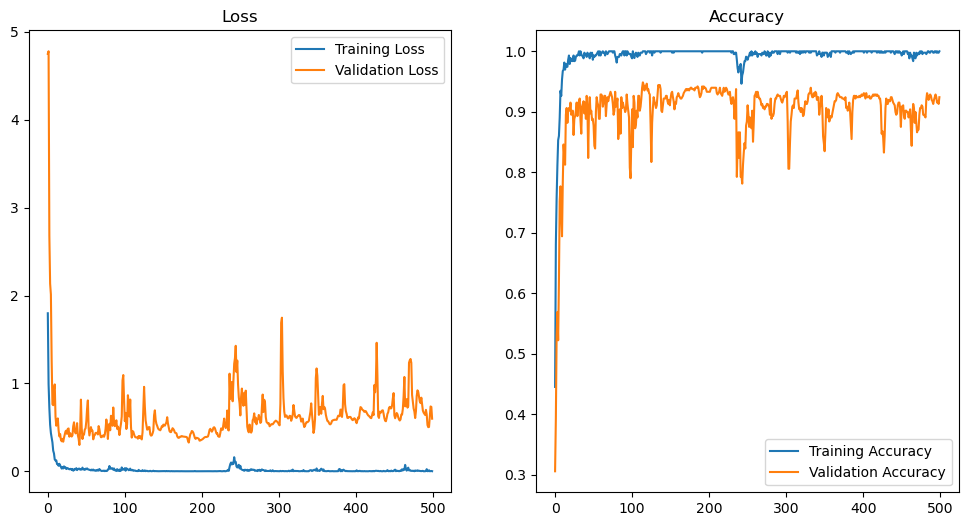

In [7]:
    
    
    
    
    
    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()
